# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.7.3-alpha.new.202.203.206'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

2

: 

['Papua New Guinea', 'Seychelles', 'Namibia', 'Belize']

,
 

3

: 

[

'Brunei'

, 

'Zimbabwe'

, 

'Mauritius'

, 

'Lesotho'

, 

'Tanzania'

, 

'Bahamas'

,
     

'Trinidad and Tobago'

, 

'Antigua and Barbuda'

, 

'Fiji'

, 

'Gambia'

]

,
 

4

: 

[

'Montenegro'

, 

'Yemen'

, 

'Botswana'

, 

'New Zealand'

,
     

'Central African Republic'

, 

'South Sudan'

, 

'Saint Lucia'

,
     

'Equatorial Guinea'

, 

'Eritrea'

, 

'Zambia'

, 

'Vietnam'

, 

'Libya'

, 

'Kyrgyzstan'

,
     

'Sao Tome and Principe'

, 

'Ireland'

, 

'Malta'

, 

'Norway'

, 

'Angola'

,
     

'Palestine'

, 

'Grenada'

]

,
 

5

: 

[

'Guyana'

, 

'Philippines'

, 

'Iceland'

, 

'Australia'

,
     

'Saint Vincent and the Grenadines'

, 

'Syria'

, 

'Venezuela'

, 

'Madagascar'

,
     

'Morocco'

, 

'Suriname'

, 

'Chad'

, 

'Lebanon'

, 

'Japan'

, 

'Ethiopia'

, 

'Guatemala'

,
     

'Comoros'

, 

'San Marino'

, 

'Israel'

, 

'Paraguay'

, 

'Mongolia'

, 

'Costa Rica'

,
     

'Liechtenstein'

, 

'Kosovo'

, 

'Maldives'

, 

'Kazakhstan'

, 

'Malawi'

]

,
 

6

: 

[

'Mozambique'

, 

'India'

, 

'Oman'

, 

'Benin'

, 

'Cambodia'

, 

'Slovakia'

, 

'Cameroon'

,
     

'Andorra'

, 

'Cuba'

, 

'Colombia'

, 

'Bosnia and Herzegovina'

, 

'Burundi'

,
     

'Croatia'

, 

'Thailand'

, 

'Luxembourg'

, 

'Greece'

, 

'Bermuda'

, 

'Swaziland'

,
     

'Honduras'

, 

'Somalia'

, 

'Kenya'

, 

'Argentina'

, 

'Guinea-Bissau'

, 

'Bhutan'

,
     

'Uzbekistan'

, 

'Spain'

, 

'Congo'

, 

'Sri Lanka'

, 

'Nepal'

, 

'Qatar'

, 

'Cyprus'

,
     

'Uganda'

, 

'Taiwan'

, 

'Haiti'

, 

'Tajikistan'

, 

'Afghanistan'

]

,
 

7

: 

[

'Bulgaria'

, 

'Egypt'

, 

'El Salvador'

, 

'Macedonia'

, 

'Mauritania'

, 

'Ghana'

,
     

'Gabon'

, 

'Monaco'

, 

'Germany'

, 

'Iraq'

, 

'Sudan'

, 

'Cape Verde'

, 

'Slovenia'

,
     

'Armenia'

, 

'Azerbaijan'

, 

'China'

, 

'Uruguay'

, 

'Belarus'

, 

'Jordan'

,
     

'Switzerland'

, 

'Barbados'

, 

'South Africa'

, 

'Jamaica'

, 

'Serbia'

,
     

'Sierra Leone'

, 

'Ecuador'

, 

'Burkina Faso'

, 

'Panama'

, 

'Niger'

, 

'Togo'

,
     

'Pakistan'

, 

'Djibouti'

, 

'Latvia'

, 

'Dominican Republic'

, 

'Rwanda'

,
     

'Indonesia'

, 

'Canada'

, 

'Chile'

, 

'Netherlands'

, 

'Albania'

, 

'Finland'

]

,
 

8

: 

[

'Saudi Arabia'

, 

'Hungary'

, 

'Malaysia'

, 

'Belgium'

, 

'Denmark'

, 

'Algeria'

,
     

'Liberia'

, 

'Bolivia'

, 

'Tunisia'

, 

'Brazil'

, 

'Singapore'

, 

'Estonia'

,
     

'Austria'

, 

'Ukraine'

, 

'Romania'

, 

'Lithuania'

, 

'Nicaragua'

]

,
 

9

: 

[

'Kuwait'

, 

'Czech Republic'

, 

'Nigeria'

, 

'Turkey'

, 

'Portugal'

, 

'Georgia'

,
     

'Peru'

, 

'Russia'

, 

'France'

, 

'Mexico'

, 

'Myanmar'

, 

'Italy'

, 

'Bangladesh'

,
     

'Mali'

, 

'Moldova'

, 

'United States'

]

,
 

10

: 

[

'Korea, South'

, 

'Senegal'

, 

'Poland'

, 

'United Arab Emirates'

, 

'Guinea'

,
      

'Iran'

, 

'Bahrain'

]

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=9)
# The number of countries
len(analyser.countries)

23

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

9

: 

[

'Kuwait'

, 

'Czech Republic'

, 

'Nigeria'

, 

'Turkey'

, 

'Portugal'

, 

'Georgia'

,
     

'Peru'

, 

'Russia'

, 

'France'

, 

'Mexico'

, 

'Myanmar'

, 

'Italy'

, 

'Bangladesh'

,
     

'Mali'

, 

'Moldova'

, 

'United States'

]

,
 

10

: 

[

'Korea, South'

, 

'Senegal'

, 

'Poland'

, 

'United Arab Emirates'

, 

'Guinea'

,
      

'Iran'

, 

'Bahrain'

]

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country      Phase                                        
Korea, South 1st    Past  15Mar2020  25Mar2020    51606633
             2nd    Past  26Mar2020  06Apr2020    51606633
             3rd    Past  07Apr2020  29Apr2020    51606633
             4th    Past  30Apr2020  23May2020    51606633
             5th    Past  24May2020  16Jun2020    51606633
...                  ...        ...        ...         ...
Bahrain      6th    Past  07Jul2020  14Jul2020     1569439
             7th    Past  15Jul2020  24Jul2020     1569439
             8th    Past  25Jul2020  04Aug2020     1569439
             9th    Past  05Aug2020  15Aug2020     1569439
             10th   Past  16Aug2020  27Aug2020     1569439

[70 rows x 4 columns]

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	IRN,  9th phase (29Jul2020 - 11Aug2020): finished  157 trials in 0 min  5 sec

	IRN,  7th phase (05Jul2020 - 16Jul2020): finished  157 trials in 0 min  5 sec

	MDA,  2nd phase (03Jun2020 - 15Jun2020): finished 1395 trials in 1 min  0 sec

	RUS,  3rd phase (31May2020 - 14Jun2020): finished 1377 trials in 1 min  0 sec

	SEN,  7th phase (11Jul2020 - 21Jul2020): finished 1397 trials in 1 min  0 sec

	RUS,  4th phase (15Jun2020 - 23Jun2020): finished 1399 trials in 1 min  0 sec

	ARE,  9th phase (25Jul2020 - 09Aug2020): finished  564 trials in 0 min 20 sec

	KOR,  5th phase (24May2020 - 16Jun2020): finished  797 trials in 0 min 30 sec

	BGD,  4th phase (29Jun2020 - 06Jul2020): finished  692 trials in 0 min 25 sec

	USA,  3rd phase (05Jun2020 - 25Jun2020): finished 1410 trials in 1 min  0 sec

	CZE,  2nd phase (20Apr2020 - 12May2020): finished 1384 trials in 1 min  0 sec

	PER,  7th phase (29Jul2020 - 05Aug2020): finished 1398 trials in 1 min  0 sec

	GIN,  7th phase (15Jul2020 - 24Jul2020): finished 1405 trials in 1 min  0 sec

	ARE,  8th phase (11Jul2020 - 24Jul2020): finished  990 trials in 0 min 40 sec

	BGD,  8th phase (05Aug2020 - 15Aug2020): finished  302 trials in 0 min 10 sec

	FRA,  7th phase (20Jun2020 - 12Jul2020): finished  558 trials in 0 min 20 sec

	MLI,  4th phase (25May2020 - 01Jun2020): finished  571 trials in 0 min 20 sec

	ARE,  7th phase (03Jul2020 - 10Jul2020): finished 1409 trials in 1 min  0 sec

	IRN,  1st phase (29Mar2020 - 16Apr2020): finished 1403 trials in 1 min  0 sec

	POL,  8th phase (28Jul2020 - 07Aug2020): finished  435 trials in 0 min 15 sec

	CZE,  1st phase (08Apr2020 - 19Apr2020): finished 1411 trials in 1 min  0 sec

	MLI,  2nd phase (03May2020 - 14May2020): finished 1404 trials in 1 min  0 sec

	MMR,  9th phase (16Aug2020 - 27Aug2020): finished 1158 trials in 1 min  0 sec

	SEN, 10th phase (13Aug2020 - 27Aug2020): finished 1131 trials in 1 min  0 sec

	KWT,  2nd phase (25May2020 - 09Jun2020): finished 1120 trials in 1 min  0 sec

	CZE,  9th phase (19Aug2020 - 27Aug2020): finished 1020 trials in 1 min  0 sec

	KWT,  9th phase (15Aug2020 - 27Aug2020): finished  536 trials in 0 min 30 sec

	NGA,  8th phase (08Aug2020 - 17Aug2020): finished  967 trials in 1 min  0 sec

	ARE,  1st phase (27Apr2020 - 12May2020): finished  966 trials in 1 min  0 sec

	FRA,  8th phase (13Jul2020 - 01Aug2020): finished  525 trials in 0 min 30 sec

	ITA,  3rd phase (12Apr2020 - 20Apr2020): finished  191 trials in 0 min 10 sec

	ITA,  4th phase (21Apr2020 - 01May2020): finished  106 trials in 0 min  5 sec

	MMR,  3rd phase (26May2020 - 05Jun2020): finished  957 trials in 1 min  0 sec

	GIN,  9th phase (06Aug2020 - 16Aug2020): finished  914 trials in 1 min  0 sec

	MLI,  3rd phase (15May2020 - 24May2020): finished  901 trials in 1 min  0 sec

	FRA,  6th phase (27May2020 - 19Jun2020): finished  879 trials in 1 min  0 sec

	RUS,  1st phase (08May2020 - 22May2020): finished  845 trials in 1 min  0 sec

	KWT,  6th phase (14Jul2020 - 23Jul2020): finished  341 trials in 0 min 30 sec

	KOR,  4th phase (30Apr2020 - 23May2020): finished  305 trials in 0 min 25 sec

	ARE,  5th phase (12Jun2020 - 22Jun2020): finished  758 trials in 1 min  1 sec

	PRT,  1st phase (04May2020 - 17May2020): finished  766 trials in 1 min  0 sec

	TUR,  9th phase (14Aug2020 - 27Aug2020): finished  198 trials in 0 min 10 sec

	ITA,  5th phase (02May2020 - 10May2020): finished  457 trials in 0 min 25 sec

	CZE,  7th phase (27Jul2020 - 04Aug2020): finished  917 trials in 1 min  1 sec

	GIN,  2nd phase (13May2020 - 22May2020): finished  939 trials in 1 min  1 sec

	KWT,  3rd phase (10Jun2020 - 22Jun2020): finished  651 trials in 0 min 40 sec

	BHR,  2nd phase (31May2020 - 10Jun2020): finished  954 trials in 1 min  1 sec

	TUR,  3rd phase (16May2020 - 28May2020): finished  186 trials in 0 min 10 sec

	KWT,  5th phase (04Jul2020 - 13Jul2020): finished  186 trials in 0 min 10 sec

	MEX,  5th phase (09Jul2020 - 16Jul2020): finished  936 trials in 1 min  0 sec

	MMR,  4th phase (06Jun2020 - 14Jun2020): finished  929 trials in 1 min  0 sec

	PRT,  6th phase (03Jul2020 - 11Jul2020): finished  490 trials in 0 min 30 sec

	SEN,  1st phase (01May2020 - 14May2020): finished  883 trials in 1 min  0 sec

	MMR,  2nd phase (15May2020 - 25May2020): finished  469 trials in 0 min 30 sec

	RUS,  5th phase (24Jun2020 - 04Jul2020): finished  863 trials in 1 min  0 sec

	POL,  4th phase (05Jun2020 - 16Jun2020): finished  874 trials in 1 min  0 sec

	KOR,  9th phase (04Aug2020 - 16Aug2020): finished  872 trials in 1 min  0 sec

	KOR,  3rd phase (07Apr2020 - 29Apr2020): finished  899 trials in 1 min  0 sec

	GEO,  6th phase (07Jul2020 - 20Jul2020): finished  909 trials in 1 min  0 sec

	POL,  3rd phase (22May2020 - 04Jun2020): finished  348 trials in 0 min 20 sec

	PER,  5th phase (07Jul2020 - 18Jul2020): finished  915 trials in 1 min  0 sec

	MMR,  8th phase (25Jul2020 - 15Aug2020): finished  653 trials in 0 min 40 sec

	KOR,  1st phase (15Mar2020 - 25Mar2020): finished  926 trials in 1 min  0 sec

	POL,  7th phase (16Jul2020 - 27Jul2020): finished  922 trials in 1 min  0 sec

	ARE,  4th phase (04Jun2020 - 11Jun2020): finished  925 trials in 1 min  0 sec

	CZE,  3rd phase (13May2020 - 09Jun2020): finished  928 trials in 1 min  0 sec

	MEX,  2nd phase (08Jun2020 - 19Jun2020): finished  884 trials in 0 min 55 sec

	MLI,  9th phase (01Aug2020 - 27Aug2020): finished  949 trials in 1 min  0 sec

	USA,  6th phase (16Jul2020 - 23Jul2020): finished  189 trials in 0 min 10 sec

	GIN,  1st phase (02May2020 - 12May2020): finished  955 trials in 1 min  0 sec

	FRA,  4th phase (25Apr2020 - 05May2020): finished  943 trials in 1 min  0 sec

	POL,  1st phase (24Apr2020 - 08May2020): finished  934 trials in 1 min  0 sec

	KWT,  1st phase (12May2020 - 24May2020): finished  929 trials in 1 min  0 sec

	NGA,  9th phase (18Aug2020 - 27Aug2020): finished  944 trials in 1 min  0 sec

	POL,  2nd phase (09May2020 - 21May2020): finished  362 trials in 0 min 20 sec

	MMR,  7th phase (09Jul2020 - 24Jul2020): finished  920 trials in 1 min  0 sec

	GEO,  8th phase (06Aug2020 - 14Aug2020): finished  936 trials in 1 min  0 sec

	MMR,  6th phase (28Jun2020 - 08Jul2020): finished  935 trials in 1 min  0 sec

	TUR,  1st phase (18Apr2020 - 29Apr2020): finished  948 trials in 1 min  0 sec

	PER,  2nd phase (29May2020 - 10Jun2020): finished  943 trials in 1 min  0 sec

	PRT,  3rd phase (01Jun2020 - 12Jun2020): finished  518 trials in 0 min 30 sec

	RUS,  9th phase (10Aug2020 - 27Aug2020): finished  950 trials in 1 min  0 sec

	IRN, 10th phase (12Aug2020 - 27Aug2020): finished  364 trials in 0 min 20 sec

	RUS,  8th phase (28Jul2020 - 09Aug2020): finished  951 trials in 1 min  0 sec

	FRA,  1st phase (25Mar2020 - 02Apr2020): finished  970 trials in 1 min  0 sec

	FRA,  3rd phase (12Apr2020 - 24Apr2020): finished  953 trials in 1 min  0 sec

	USA,  7th phase (24Jul2020 - 07Aug2020): finished  192 trials in 0 min 10 sec

	NGA,  3rd phase (20Jun2020 - 27Jun2020): finished  600 trials in 0 min 35 sec

	NGA,  2nd phase (09Jun2020 - 19Jun2020): finished  438 trials in 0 min 25 sec

	GEO,  3rd phase (14May2020 - 29May2020): finished  946 trials in 1 min  0 sec

	PER,  6th phase (19Jul2020 - 28Jul2020): finished  934 trials in 1 min  0 sec

	BGD,  1st phase (27May2020 - 11Jun2020): finished  916 trials in 1 min  0 sec

	MEX,  6th phase (17Jul2020 - 28Jul2020): finished  930 trials in 1 min  0 sec

	BGD,  5th phase (07Jul2020 - 14Jul2020): finished  933 trials in 1 min  0 sec

	KOR,  7th phase (03Jul2020 - 20Jul2020): finished  911 trials in 1 min  0 sec

	NGA,  1st phase (24May2020 - 08Jun2020): finished  808 trials in 0 min 50 sec

	BHR,  3rd phase (11Jun2020 - 20Jun2020): finished  811 trials in 0 min 50 sec

	PRT,  5th phase (23Jun2020 - 02Jul2020): finished  198 trials in 0 min 10 sec

	MLI,  5th phase (02Jun2020 - 09Jun2020): finished  834 trials in 0 min 50 sec

	CZE,  4th phase (10Jun2020 - 27Jun2020): finished  944 trials in 1 min  0 sec

	MEX,  1st phase (21May2020 - 07Jun2020): finished  185 trials in 0 min 10 sec

	MEX,  4th phase (01Jul2020 - 08Jul2020): finished  202 trials in 0 min 10 sec

	TUR,  4th phase (29May2020 - 13Jun2020): finished  184 trials in 0 min 10 sec

	SEN,  6th phase (02Jul2020 - 10Jul2020): finished  951 trials in 1 min  0 sec

	MDA,  5th phase (09Jul2020 - 20Jul2020): finished  358 trials in 0 min 20 sec

	ITA,  7th phase (21May2020 - 08Jun2020): finished  274 trials in 0 min 15 sec

	MLI,  6th phase (10Jun2020 - 24Jun2020): finished  966 trials in 1 min  0 sec

	NGA,  5th phase (13Jul2020 - 20Jul2020): finished  364 trials in 0 min 20 sec

	PER,  4th phase (23Jun2020 - 06Jul2020): finished  954 trials in 1 min  0 sec

	ARE,  2nd phase (13May2020 - 25May2020): finished  976 trials in 1 min  0 sec

	ARE,  3rd phase (26May2020 - 03Jun2020): finished  957 trials in 1 min  0 sec

	TUR,  6th phase (27Jun2020 - 11Jul2020): finished  284 trials in 0 min 15 sec

	NGA,  6th phase (21Jul2020 - 29Jul2020): finished  947 trials in 1 min  0 sec

	MLI,  8th phase (04Jul2020 - 31Jul2020): finished  937 trials in 1 min  0 sec

	NGA,  4th phase (28Jun2020 - 12Jul2020): finished  593 trials in 0 min 35 sec

	GIN,  6th phase (02Jul2020 - 14Jul2020): finished  942 trials in 1 min  0 sec

	GIN,  5th phase (16Jun2020 - 01Jul2020): finished  949 trials in 1 min  0 sec

	FRA,  9th phase (02Aug2020 - 27Aug2020): finished  568 trials in 0 min 35 sec

	MMR,  5th phase (15Jun2020 - 27Jun2020): finished  943 trials in 1 min  0 sec

	MEX,  3rd phase (20Jun2020 - 30Jun2020): finished  955 trials in 1 min  0 sec

	PER,  3rd phase (11Jun2020 - 22Jun2020): finished  934 trials in 1 min  0 sec

	KOR,  2nd phase (26Mar2020 - 06Apr2020): finished  521 trials in 0 min 30 sec

	GIN,  4th phase (31May2020 - 15Jun2020): finished  928 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 31May2020): finished  931 trials in 1 min  0 sec

	PER,  1st phase (11May2020 - 28May2020): finished  946 trials in 1 min  0 sec

	TUR,  2nd phase (30Apr2020 - 15May2020): finished  511 trials in 0 min 30 sec

	KWT,  4th phase (23Jun2020 - 03Jul2020): finished  949 trials in 1 min  0 sec

	BGD,  3rd phase (21Jun2020 - 28Jun2020): finished  957 trials in 1 min  0 sec

	RUS,  6th phase (05Jul2020 - 15Jul2020): finished  950 trials in 1 min  0 sec

	USA,  5th phase (08Jul2020 - 15Jul2020): finished  378 trials in 0 min 20 sec

	ITA,  1st phase (23Mar2020 - 31Mar2020): finished  961 trials in 1 min  0 sec

	BHR,  1st phase (06May2020 - 30May2020): finished  946 trials in 1 min  0 sec

	USA,  8th phase (08Aug2020 - 15Aug2020): finished  479 trials in 0 min 30 sec

	GEO,  7th phase (21Jul2020 - 05Aug2020): finished  866 trials in 1 min  0 sec

	SEN,  2nd phase (15May2020 - 27May2020): finished  873 trials in 1 min  0 sec

	GEO,  2nd phase (24Apr2020 - 13May2020): finished  878 trials in 1 min  0 sec

	POL,  9th phase (08Aug2020 - 16Aug2020): finished  223 trials in 0 min 10 sec

	CZE,  5th phase (28Jun2020 - 16Jul2020): finished  925 trials in 1 min  1 sec

	PRT,  4th phase (13Jun2020 - 22Jun2020): finished  343 trials in 0 min 25 sec

	SEN,  3rd phase (28May2020 - 08Jun2020): finished  851 trials in 1 min  1 sec

	USA,  1st phase (20Apr2020 - 11May2020): finished  829 trials in 1 min  0 sec

	TUR,  7th phase (12Jul2020 - 29Jul2020): finished   66 trials in 0 min  5 sec

	NGA,  7th phase (30Jul2020 - 07Aug2020): finished  775 trials in 1 min  1 sec

	MLI,  7th phase (25Jun2020 - 03Jul2020): finished  333 trials in 0 min 20 sec

	PRT,  9th phase (11Aug2020 - 27Aug2020): finished  884 trials in 1 min  1 sec

	SEN,  5th phase (20Jun2020 - 01Jul2020): finished  827 trials in 0 min 50 sec

	SEN,  9th phase (02Aug2020 - 12Aug2020): finished  955 trials in 1 min  0 sec

	IRN,  6th phase (23Jun2020 - 04Jul2020): finished  125 trials in 0 min  5 sec

	MMR,  1st phase (29Apr2020 - 14May2020): finished 1075 trials in 1 min  0 sec

	RUS,  2nd phase (23May2020 - 30May2020): finished  972 trials in 1 min  0 sec

	GEO,  5th phase (11Jun2020 - 06Jul2020): finished  921 trials in 1 min  0 sec

	MDA,  4th phase (26Jun2020 - 08Jul2020): finished  936 trials in 1 min  0 sec

	FRA,  5th phase (06May2020 - 26May2020): finished  409 trials in 0 min 25 sec

	ITA,  8th phase (09Jun2020 - 20Jul2020): finished  536 trials in 0 min 35 sec

	ITA,  9th phase (21Jul2020 - 27Aug2020): finished  880 trials in 1 min  0 sec

	BGD,  7th phase (25Jul2020 - 04Aug2020): finished  287 trials in 0 min 15 sec

	POL,  6th phase (01Jul2020 - 15Jul2020): finished  255 trials in 0 min 15 sec

	GEO,  1st phase (12Apr2020 - 23Apr2020): finished  935 trials in 1 min  1 sec

	PRT,  7th phase (12Jul2020 - 23Jul2020): finished  207 trials in 0 min 10 sec

	GIN,  8th phase (25Jul2020 - 05Aug2020): finished  598 trials in 0 min 35 sec

	MLI,  1st phase (25Apr2020 - 02May2020): finished 1143 trials in 1 min  0 sec

	PRT,  8th phase (24Jul2020 - 10Aug2020): finished  616 trials in 0 min 20 sec

	PER,  8th phase (06Aug2020 - 18Aug2020): finished 1438 trials in 1 min  0 sec

	KWT,  7th phase (24Jul2020 - 03Aug2020): finished  175 trials in 0 min  5 sec

	KOR,  8th phase (21Jul2020 - 03Aug2020): finished 1512 trials in 1 min  0 sec

	GEO,  4th phase (30May2020 - 10Jun2020): finished 1536 trials in 1 min  0 sec

	KOR, 10th phase (17Aug2020 - 27Aug2020): finished 1533 trials in 1 min  0 sec

	CZE,  8th phase (05Aug2020 - 18Aug2020): finished 1534 trials in 1 min  0 sec

	SEN,  8th phase (22Jul2020 - 01Aug2020): finished 1002 trials in 0 min 35 sec

	USA,  4th phase (26Jun2020 - 07Jul2020): finished 1542 trials in 1 min  0 sec

	POL,  5th phase (17Jun2020 - 30Jun2020): finished  173 trials in 0 min  5 sec

	IRN,  2nd phase (17Apr2020 - 10May2020): finished  170 trials in 0 min  5 sec

	TUR,  5th phase (14Jun2020 - 26Jun2020): finished 1536 trials in 1 min  0 sec

	ITA,  2nd phase (01Apr2020 - 11Apr2020): finished 1109 trials in 0 min 40 sec

	CZE,  6th phase (17Jul2020 - 26Jul2020): finished 1538 trials in 1 min  0 sec

	FRA,  2nd phase (03Apr2020 - 11Apr2020): finished 1533 trials in 1 min  0 sec

	KWT,  8th phase (04Aug2020 - 14Aug2020): finished  482 trials in 0 min 15 sec

	MDA,  1st phase (09May2020 - 02Jun2020): finished 1558 trials in 1 min  0 sec

	ITA,  6th phase (11May2020 - 20May2020): finished  202 trials in 0 min  5 sec

	MDA,  3rd phase (16Jun2020 - 25Jun2020): finished  384 trials in 0 min 10 sec

	USA,  2nd phase (12May2020 - 04Jun2020): finished 1642 trials in 1 min  0 sec

	BGD,  2nd phase (12Jun2020 - 20Jun2020): finished 1717 trials in 1 min  0 sec

	KOR,  6th phase (17Jun2020 - 02Jul2020): finished 1713 trials in 1 min  0 sec

	TUR,  8th phase (30Jul2020 - 13Aug2020): finished  555 trials in 0 min 15 sec

Completed optimization. Total: 37 min 21 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country      Phase                                                        
Korea, South 1st    Past  15Mar2020  25Mar2020    51606633  SIR-F   0.3   
             2nd    Past  26Mar2020  06Apr2020    51606633  SIR-F  0.44   
             3rd    Past  07Apr2020  29Apr2020    51606633  SIR-F  0.12   
             4th    Past  30Apr2020  23May2020    51606633  SIR-F  0.33   
             5th    Past  24May2020  16Jun2020    51606633  SIR-F  1.74   
...                  ...        ...        ...         ...    ...   ...   
Bahrain      6th    Past  07Jul2020  14Jul2020     1569439      -     -   
             7th    Past  15Jul2020  24Jul2020     1569439      -     -   
             8th    Past  25Jul2020  04Aug2020     1569439      -     -   
             9th    Past  05Aug2020  15Aug2020     1569439      -     -   
             10th   Past  16Aug2020  27Aug2020     1569439      -     -   

                          theta        kappa         rho       sigma  tau  \
Country      Phase                                                          
Korea, South 1st      0.0355164  4.58288e-05  0.00384544   0.0121758  360   
             2nd    0.000126864  0.000292351  0.00571777   0.0127472  360   
             3rd       0.190796  3.66355e-06  0.00148135  0.00975935  360   
             4th      0.0064892  0.000162239  0.00450393   0.0134568  360   
             5th     0.00161292  0.000122199   0.0126021  0.00711507  360   
...                         ...          ...         ...         ...  ...   
Bahrain      6th              -            -           -           -    -   
             7th              -            -           -           -    -   
             8th              -            -           -           -    -   
             9th              -            -           -           -    -   
             10th             -            -           -           -    -   

                   1/gamma [day] 1/beta [day] alpha1 [-] 1/alpha2 [day]  \
Country      Phase                                                        
Korea, South 1st              20           65      0.036           5455   
             2nd              19           43          0            855   
             3rd              25          168      0.191          68239   
             4th              18           55      0.006           1540   
             5th              35           19      0.002           2045   
...                          ...          ...        ...            ...   
Bahrain      6th               -            -          -              -   
             7th               -            -          -              -   
             8th               -            -          -              -   
             9th               -            -          -              -   
             10th              -            -          -              -   

                        RMSLE Trials       Runtime  
Country      Phase                                  
Korea, South 1st     0.163799    926  1 min  0 sec  
             2nd    0.0290512    521  0 min 30 sec  
             3rd    0.0509398    899  1 min  0 sec  
             4th    0.0762359    305  0 min 25 sec  
             5th    0.0266636    797  0 min 30 sec  
...                       ...    ...           ...  
Bahrain      6th            -      -             -  
             7th            -      -             -  
             8th            -      -             -  
             9th            -      -             -  
             10th           -      -             -  

[70 rows x 18 columns]

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-05-12,Kuwait,0.000749778,0.000157435,0.0198463,0.00542485,0.001,1587,12,46,...,2,4,2,3,2,4,2,2,2,100.0
1,2020-05-13,Kuwait,0.000749778,0.000157435,0.0198463,0.00542485,0.001,1587,12,46,...,2,4,2,3,2,4,2,2,2,100.0
2,2020-05-14,Kuwait,0.000749778,0.000157435,0.0198463,0.00542485,0.001,1587,12,46,...,2,4,2,3,2,4,2,2,2,100.0
3,2020-05-15,Kuwait,0.000749778,0.000157435,0.0198463,0.00542485,0.001,1587,12,46,...,2,4,2,3,2,4,2,2,2,100.0
4,2020-05-16,Kuwait,0.000749778,0.000157435,0.0198463,0.00542485,0.001,1587,12,46,...,2,4,2,3,2,4,2,2,2,100.0


### $Rt$: Reprodcution number $\mathrm{[-]}$

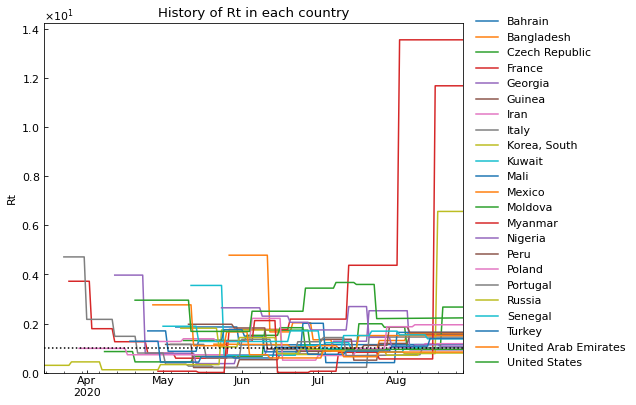

Country,Bahrain,Bangladesh,Czech Republic,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,...,Myanmar,Nigeria,Peru,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-23,1.15,1.59,2.67,13.54,0.93,1.54,1.18,1.45,6.56,1.04,...,11.67,1.08,1.64,1.95,1.01,0.8,1.38,1.39,0.84,2.23
2020-08-24,1.15,1.59,2.67,13.54,0.93,1.54,1.18,1.45,6.56,1.04,...,11.67,1.08,1.64,1.95,1.01,0.8,1.38,1.39,0.84,2.23
2020-08-25,1.15,1.59,2.67,13.54,0.93,1.54,1.18,1.45,6.56,1.04,...,11.67,1.08,1.64,1.95,1.01,0.8,1.38,1.39,0.84,2.23
2020-08-26,1.15,1.59,2.67,13.54,0.93,1.54,1.18,1.45,6.56,1.04,...,11.67,1.08,1.64,1.95,1.01,0.8,1.38,1.39,0.84,2.23
2020-08-27,1.15,1.59,2.67,13.54,0.93,1.54,1.18,1.45,6.56,1.04,...,11.67,1.08,1.64,1.95,1.01,0.8,1.38,1.39,0.84,2.23


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

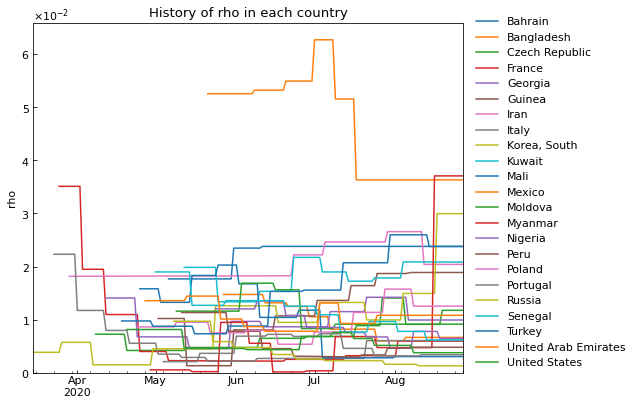

Country,Bahrain,Bangladesh,Czech Republic,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,...,Myanmar,Nigeria,Peru,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-23,0.023801,0.006655,0.011752,0.005948,0.009929,0.018883,0.020405,0.006048,0.029969,0.020847,...,0.037083,0.006473,0.004794,0.01254,0.00338,0.001291,0.006175,0.023778,0.010816,0.003771
2020-08-24,0.023801,0.006655,0.011752,0.005948,0.009929,0.018883,0.020405,0.006048,0.029969,0.020847,...,0.037083,0.006473,0.004794,0.01254,0.00338,0.001291,0.006175,0.023778,0.010816,0.003771
2020-08-25,0.023801,0.006655,0.011752,0.005948,0.009929,0.018883,0.020405,0.006048,0.029969,0.020847,...,0.037083,0.006473,0.004794,0.01254,0.00338,0.001291,0.006175,0.023778,0.010816,0.003771
2020-08-26,0.023801,0.006655,0.011752,0.005948,0.009929,0.018883,0.020405,0.006048,0.029969,0.020847,...,0.037083,0.006473,0.004794,0.01254,0.00338,0.001291,0.006175,0.023778,0.010816,0.003771
2020-08-27,0.023801,0.006655,0.011752,0.005948,0.009929,0.018883,0.020405,0.006048,0.029969,0.020847,...,0.037083,0.006473,0.004794,0.01254,0.00338,0.001291,0.006175,0.023778,0.010816,0.003771


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

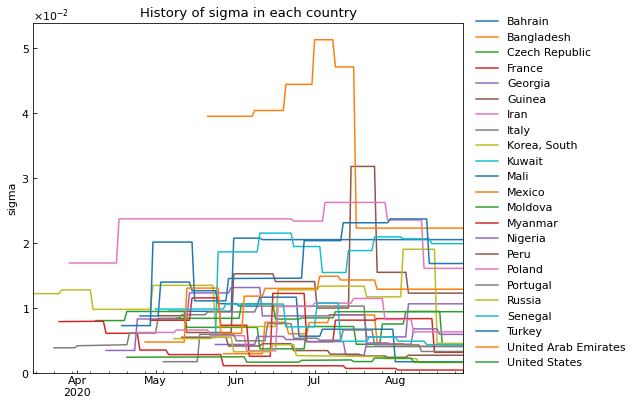

Country,Bahrain,Bangladesh,Czech Republic,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,...,Myanmar,Nigeria,Peru,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-23,0.020497,0.004097,0.004327,0.000414,0.010611,0.012257,0.016069,0.00402,0.004508,0.019877,...,0.003139,0.005908,0.00269,0.006288,0.003272,0.001567,0.004332,0.016817,0.012857,0.001623
2020-08-24,0.020497,0.004097,0.004327,0.000414,0.010611,0.012257,0.016069,0.00402,0.004508,0.019877,...,0.003139,0.005908,0.00269,0.006288,0.003272,0.001567,0.004332,0.016817,0.012857,0.001623
2020-08-25,0.020497,0.004097,0.004327,0.000414,0.010611,0.012257,0.016069,0.00402,0.004508,0.019877,...,0.003139,0.005908,0.00269,0.006288,0.003272,0.001567,0.004332,0.016817,0.012857,0.001623
2020-08-26,0.020497,0.004097,0.004327,0.000414,0.010611,0.012257,0.016069,0.00402,0.004508,0.019877,...,0.003139,0.005908,0.00269,0.006288,0.003272,0.001567,0.004332,0.016817,0.012857,0.001623
2020-08-27,0.020497,0.004097,0.004327,0.000414,0.010611,0.012257,0.016069,0.00402,0.004508,0.019877,...,0.003139,0.005908,0.00269,0.006288,0.003272,0.001567,0.004332,0.016817,0.012857,0.001623


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

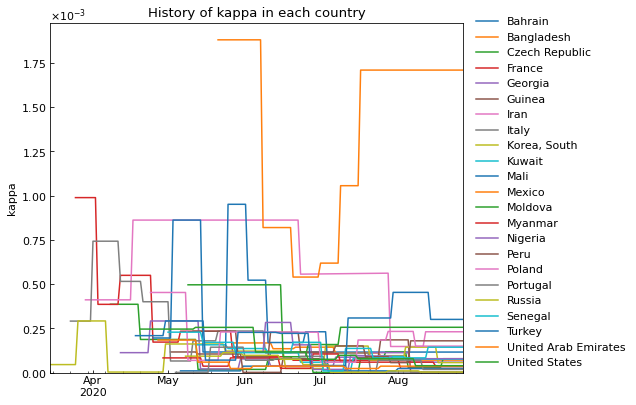

Country,Bahrain,Bangladesh,Czech Republic,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,...,Myanmar,Nigeria,Peru,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-23,0.000117,0.000071,0.000079,0.000024,0.00006,0.000002,0.000231,0.000004,0.000057,0.000076,...,0.000037,0.000079,0.00018,0.00015,0.000019,0.000004,0.000144,0.000301,0.000037,0.00004
2020-08-24,0.000117,0.000071,0.000079,0.000024,0.00006,0.000002,0.000231,0.000004,0.000057,0.000076,...,0.000037,0.000079,0.00018,0.00015,0.000019,0.000004,0.000144,0.000301,0.000037,0.00004
2020-08-25,0.000117,0.000071,0.000079,0.000024,0.00006,0.000002,0.000231,0.000004,0.000057,0.000076,...,0.000037,0.000079,0.00018,0.00015,0.000019,0.000004,0.000144,0.000301,0.000037,0.00004
2020-08-26,0.000117,0.000071,0.000079,0.000024,0.00006,0.000002,0.000231,0.000004,0.000057,0.000076,...,0.000037,0.000079,0.00018,0.00015,0.000019,0.000004,0.000144,0.000301,0.000037,0.00004
2020-08-27,0.000117,0.000071,0.000079,0.000024,0.00006,0.000002,0.000231,0.000004,0.000057,0.000076,...,0.000037,0.000079,0.00018,0.00015,0.000019,0.000004,0.000144,0.000301,0.000037,0.00004


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

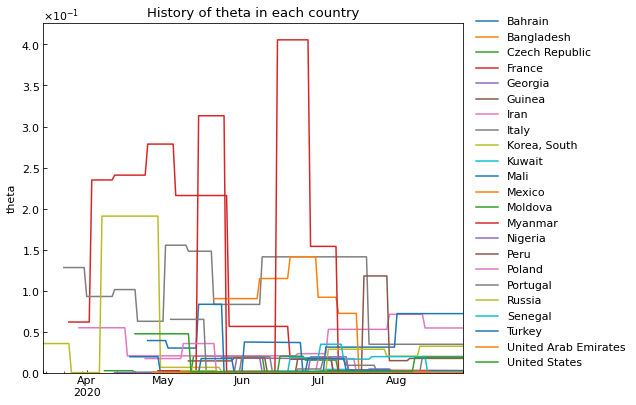

Country,Bahrain,Bangladesh,Czech Republic,France,Georgia,Guinea,Iran,Italy,"Korea, South",Kuwait,...,Myanmar,Nigeria,Peru,Poland,Portugal,Russia,Senegal,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-23,0.000634,0.001153,0.000345,0.002406,0.000228,0.001235,0.054502,0.034645,0.000164,0.000252,...,0.000659,0.000345,0.017411,0.001015,0.01978,0.03223,0.001149,0.002586,0.000679,0.0183
2020-08-24,0.000634,0.001153,0.000345,0.002406,0.000228,0.001235,0.054502,0.034645,0.000164,0.000252,...,0.000659,0.000345,0.017411,0.001015,0.01978,0.03223,0.001149,0.002586,0.000679,0.0183
2020-08-25,0.000634,0.001153,0.000345,0.002406,0.000228,0.001235,0.054502,0.034645,0.000164,0.000252,...,0.000659,0.000345,0.017411,0.001015,0.01978,0.03223,0.001149,0.002586,0.000679,0.0183
2020-08-26,0.000634,0.001153,0.000345,0.002406,0.000228,0.001235,0.054502,0.034645,0.000164,0.000252,...,0.000659,0.000345,0.017411,0.001015,0.01978,0.03223,0.001149,0.002586,0.000679,0.0183
2020-08-27,0.000634,0.001153,0.000345,0.002406,0.000228,0.001235,0.054502,0.034645,0.000164,0.000252,...,0.000659,0.000345,0.017411,0.001015,0.01978,0.03223,0.001149,0.002586,0.000679,0.0183


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31117 entries, 0 to 31424
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 31117 non-null  datetime64[ns]
 1   Country                              31117 non-null  object        
 2   Rt                                   31117 non-null  float64       
 3   theta                                31117 non-null  float64       
 4   kappa                                31117 non-null  float64       
 5   rho                                  31117 non-null  float64       
 6   sigma                                31117 non-null  float64       
 7   School_closing                       31117 non-null  int64         
 8   Workplace_closing                    31117 non-null  int64         
 9   Cancel_events                        31117 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.191378,-0.009946,0.184813,-0.295963,-0.285152,-0.053836,0.048962,0.183010,-0.096608,-0.016893,0.025468,-0.223633,0.024559,-0.078726,-0.239418,-0.096688
theta,-0.191378,1.000000,0.315196,0.059699,0.200120,0.146895,0.263189,0.121845,-0.107224,-0.062396,-0.083891,-0.077698,-0.111681,0.021800,-0.475737,-0.047517,0.198745
kappa,-0.009946,0.315196,1.000000,0.633527,0.377353,0.300775,0.461011,0.084320,-0.005977,0.164434,0.138991,0.113489,0.140995,-0.149141,-0.392606,-0.273809,0.379622
rho,0.184813,0.059699,0.633527,1.000000,0.563327,0.191219,0.125308,-0.151403,-0.115584,0.036477,0.039921,-0.009829,0.183834,-0.106171,-0.290336,-0.217484,0.168853
sigma,-0.295963,0.200120,0.377353,0.563327,1.000000,0.177360,-0.099601,-0.191244,-0.520242,-0.209277,-0.221852,-0.359218,0.090892,-0.177574,-0.329157,0.152428,-0.080687
School_closing,-0.285152,0.146895,0.300775,0.191219,0.177360,1.000000,0.546578,0.338759,0.108877,0.421654,0.438064,0.261841,0.521047,-0.035554,0.038462,-0.406359,0.637559
Workplace_closing,-0.053836,0.263189,0.461011,0.125308,-0.099601,0.546578,1.000000,0.396085,0.398259,0.457583,0.570640,0.485718,0.200398,-0.003537,0.044805,-0.476008,0.686952
Cancel_events,0.048962,0.121845,0.084320,-0.151403,-0.191244,0.338759,0.396085,1.000000,0.533490,0.359182,0.546686,0.382717,-0.004720,-0.014579,0.133611,-0.166429,0.532328
Gatherings_restrictions,0.183010,-0.107224,-0.005977,-0.115584,-0.520242,0.108877,0.398259,0.533490,1.000000,0.575475,0.653442,0.629742,0.113250,0.068103,0.294713,-0.246727,0.583631
Transport_closing,-0.096608,-0.062396,0.164434,0.036477,-0.209277,0.421654,0.457583,0.359182,0.575475,1.000000,0.634693,0.750614,0.350625,-0.079456,0.073769,-0.249798,0.792568


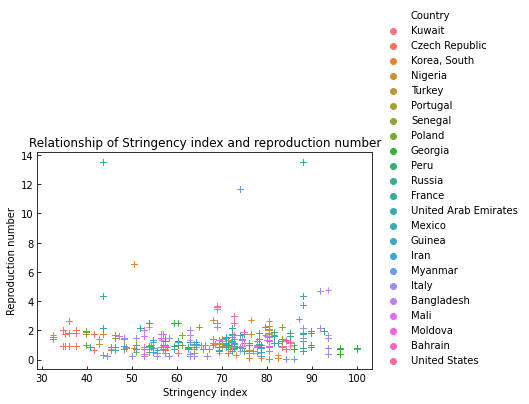

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()